In [1]:
# Preparing folder where data located
import os
print(os.getcwd())

D:\Personal\WinPython-64bit-3.5.4.1Qt5\notebooks


In [31]:
#Load related libraries to do analysis
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
%matplotlib inline

In [13]:
# Loading data set german credit scoring
df = pd.read_excel('german_credit_easy.xls')
df.head()

,ID,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,ABC0001,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,ABC0002,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,ABC0003,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,ABC0004,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,ABC0005,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [4]:
# Part 2a: Data Exploration
# Untuk tahu function/action yang bisa dilakukan untuk dataframe
dir(df)

['ID',
 'T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '

In [5]:
# Part 2a: Data Exploration
# get the number of rows and columns
print(df.shape)

(1000, 22)


In [6]:
# Searching for Missings,type of data and also known the shape of data
print(df.info())
# get the dtype of each column / tipe variabel dari semua faktor
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
ID                            1000 non-null object
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             100

In [7]:
# Part 2a: Data Exploration
# Searching for content of numeric data # summary statistics
print(df.describe())

           default  duration_in_month  credit_amount  \
count  1000.000000        1000.000000    1000.000000   
mean      0.300000          20.903000    3271.258000   
std       0.458487          12.058814    2822.736876   
min       0.000000           4.000000     250.000000   
25%       0.000000          12.000000    1365.500000   
50%       0.000000          18.000000    2319.500000   
75%       1.000000          24.000000    3972.250000   
max       1.000000          72.000000   18424.000000   

       installment_as_income_perc  present_res_since          age  \
count                 1000.000000        1000.000000  1000.000000   
mean                     2.973000           2.845000    35.546000   
std                      1.118715           1.103718    11.375469   
min                      1.000000           1.000000    19.000000   
25%                      2.000000           2.000000    27.000000   
50%                      3.000000           3.000000    33.000000   
75%         

In [8]:
#Looking unique values
print(df.nunique())

ID                            1000
default                          2
account_check_status             4
duration_in_month               33
credit_history                   5
purpose                         10
credit_amount                  921
savings                          5
present_emp_since                5
installment_as_income_perc       4
personal_status_sex              4
other_debtors                    3
present_res_since                4
property                         4
age                             53
other_installment_plans          3
housing                          3
credits_this_bank                4
job                              4
people_under_maintenance         2
telephone                        2
foreign_worker                   2
dtype: int64


In [9]:
# class distribution
print(df.groupby('default').size())

default
0    700
1    300
dtype: int64


In [10]:
# Part 2a: Data Exploration
# correlation semua
print(df.corr())
# correlation untuk 2 faktor saja
np.corrcoef(df['Income'], df['Approved']) 

                             default  duration_in_month  credit_amount  \
default                     1.000000           0.214927       0.154739   
duration_in_month           0.214927           1.000000       0.624984   
credit_amount               0.154739           0.624984       1.000000   
installment_as_income_perc  0.072404           0.074749      -0.271316   
present_res_since           0.002967           0.034067       0.028926   
age                        -0.091127          -0.036136       0.032716   
credits_this_bank          -0.045732          -0.011284       0.020795   
people_under_maintenance   -0.003015          -0.023834       0.017142   

                            installment_as_income_perc  present_res_since  \
default                                       0.072404           0.002967   
duration_in_month                             0.074749           0.034067   
credit_amount                                -0.271316           0.028926   
installment_as_income_per

KeyError: 'Income'

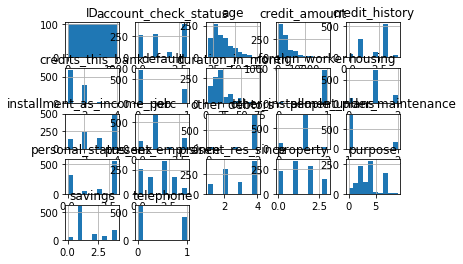

In [54]:
# Part 2a: Data Visualization
# histograms
# Distribution Analysis untuk semua
df.hist()
plt.show()

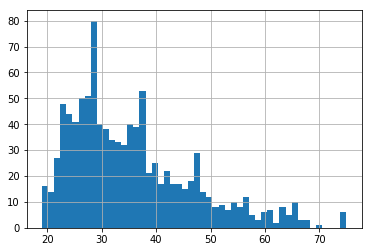

In [58]:
# Data visualization
# Histogram for selected data
df['age'].hist(bins=50) # Here we observe that there are few extreme values.

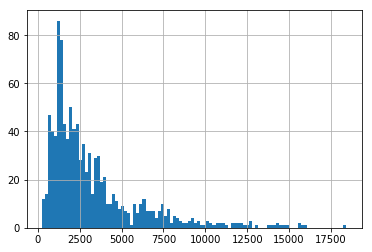

In [59]:
df['credit_amount'].hist(bins=100)

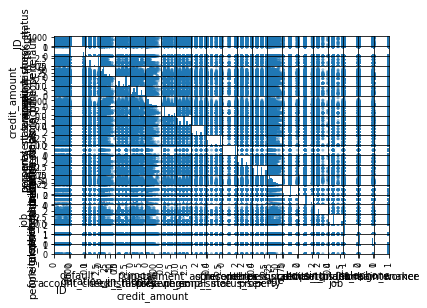

In [53]:
# Part 2a: Data Visualization
# Load required libraries
import pandas
from pandas.plotting import scatter_matrix
# scatter plot matrix
scatter_matrix(df)
plt.show()

In [25]:
# Limitation of algorithm. All text must be in numbers

from sklearn import preprocessing

for column in df.columns:
    if df[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        df[column] = le.fit_transform(df[column])

In [26]:
df_select = df

In [27]:
# 4. Modeling
## Preparation: set data input
X_Variables = df_select.drop(['default','ID'], axis=1)
Y_Variable = df_select['default']

In [28]:
# 4. Modeling
# Preparation: set training, test, and validation
from sklearn.model_selection import train_test_split
# set 70/30
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Variables, Y_Variable, test_size=0.3)

print(X_Train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 518 to 225
Data columns (total 20 columns):
account_check_status          700 non-null int64
duration_in_month             700 non-null int64
credit_history                700 non-null int64
purpose                       700 non-null int64
credit_amount                 700 non-null int64
savings                       700 non-null int64
present_emp_since             700 non-null int64
installment_as_income_perc    700 non-null int64
personal_status_sex           700 non-null int64
other_debtors                 700 non-null int64
present_res_since             700 non-null int64
property                      700 non-null int64
age                           700 non-null int64
other_installment_plans       700 non-null int64
housing                       700 non-null int64
credits_this_bank             700 non-null int64
job                           700 non-null int64
people_under_maintenance      700 non-null int64
telephone  

In [29]:
## Machine Learning Part

# machine learning library
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#to check performance of model
from sklearn.metrics import accuracy_score

#plot
import matplotlib.pyplot as plt

In [52]:
import os     

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'


from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

clf.predict([[2., 2.]])

clf.predict_proba([[2., 2.]])

from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

print(clf)

import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'iris'], make sure the Graphviz executables are on your systems' PATH

In [47]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier  
dtree = DecisionTreeClassifier()  
dtree.fit(X_Train, Y_Train)  

# Visualization of decision tree
# Visualize data
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import collections
dot_data = tree.export_graphviz(dtree,
                                feature_names=X_Train.columns,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
 
colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)
 
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))
 
for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
 
graph.write_png('tree.png')



InvocationException: GraphViz's executables not found

In [ ]:

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [60]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_Train, Y_Train)
logreg.score(X_Train, Y_Train)
Y_pred_log = logreg.predict(X_Test)

# Checking the model's accuracy
accuracy_score(Y_Test,logreg.predict(X_Test))

0.75666666666666671

In [61]:
# Random Forests
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_Train, Y_Train)
random_forest.score(X_Train, Y_Train)
Y_pred_rf = random_forest.predict(X_Test)

# Checking the model's accuracy
accuracy_score(Y_Test,random_forest.predict(X_Test))

0.75